<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-in-Practice/blob/master/3.TF-NLP/TF_NLP11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-09-25 13:02:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-09-25 13:02:22 (112 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [10]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 10, 256)           263168    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_6 (Dense)              (None, 1605)              207045    
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              5156866   
Total params: 6,235,207
Trainable params: 6,235,207
Non-trainable params: 0
____________________________________________

In [11]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 13ms/step - loss: 6.9269 - accuracy: 0.0199
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.5023 - accuracy: 0.0205
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3889 - accuracy: 0.0268
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 6.2604 - accuracy: 0.0304
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1592 - accuracy: 0.0373
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0669 - accuracy: 0.0395
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9817 - accuracy: 0.0427
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 5.8990 - accuracy: 0.0471
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 5.7979 - accuracy: 0.0517
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.692

In [12]:
import seaborn as sns
sns.set()

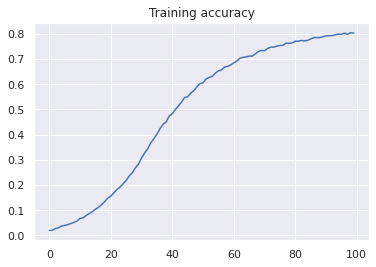

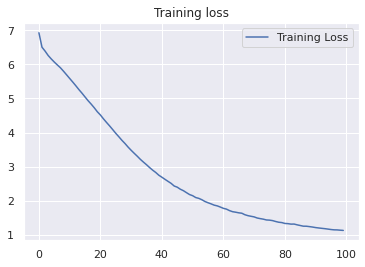

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope at some spent small pain cross cross show thee her
